In [52]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/titanic/train.csv
/kaggle/input/titanic/test.csv
/kaggle/input/titanic/gender_submission.csv


In [53]:
train_df = pd.read_csv('/kaggle/input/titanic/train.csv')
test_df = pd.read_csv('/kaggle/input/titanic/test.csv')

In [55]:
train_df.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


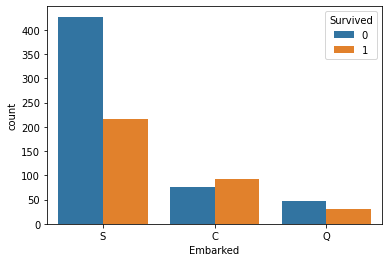

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


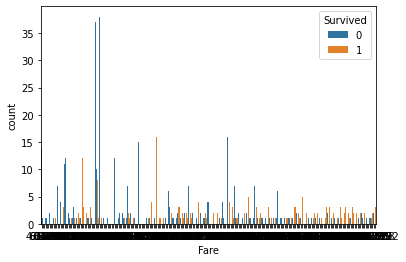

In [54]:
from matplotlib import pyplot as plt
import seaborn as sns
sns.countplot(train_df.Embarked, hue=train_df.Survived)
plt.show()
sns.countplot(train_df.Fare, hue=train_df.Survived)
plt.show()

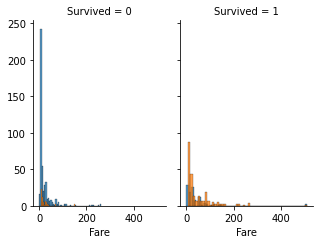

In [56]:
g = sns.FacetGrid(train_df, col="Survived", hue="Sex", height=3.5, aspect=.65)
g.map(sns.histplot, "Fare", bins=50)

In [58]:
vars = test_df.columns
test_df[vars].isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [ ]:
train_df.head(5)

vars = train.columns
print(train_df.shape)
train_df[vars].isnull().sum()

In [59]:
data = [train_df, test_df]

for dataset in data:
    mean = train_df["Age"].mean()
    std = test_df["Age"].std()
    is_null = dataset["Age"].isnull().sum()
    rand_age = np.random.randint(mean - std, mean + std, size = is_null)
    age_slice = dataset["Age"].copy()
    age_slice[np.isnan(age_slice)] = rand_age
    dataset["Age"] = age_slice
    dataset["Age"] = train_df["Age"].astype(int)

mode1 = train_df["Embarked"].mode().values[0]
train_df["Embarked"] = train_df["Embarked"].fillna(mode1)
test_df["Embarked"] = test_df["Embarked"].fillna(mode1)

In [ ]:
mode1

In [60]:
train_df[['Pclass', 'Survived']].groupby(['Pclass'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,Pclass,Survived
0,1,0.629630
1,2,0.472826
2,3,0.242363


In [61]:
train_df[['Sex', 'Survived']].groupby(['Sex'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,Sex,Survived
0,female,0.742038
1,male,0.188908


In [ ]:
train_df.head(3)

In [62]:
train_df['relatives'] = train_df['SibSp'] + train_df['Parch']
test_df['relatives'] = test_df['SibSp'] + test_df['Parch']
train_df[['relatives','Survived']].groupby(['relatives'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,relatives,Survived
3,3,0.724138
2,2,0.578431
1,1,0.552795
6,6,0.333333
0,0,0.303538
4,4,0.200000
5,5,0.136364
7,7,0.000000
8,10,0.000000


/opt/conda/lib/python3.7/site-packages/seaborn/axisgrid.py:316: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


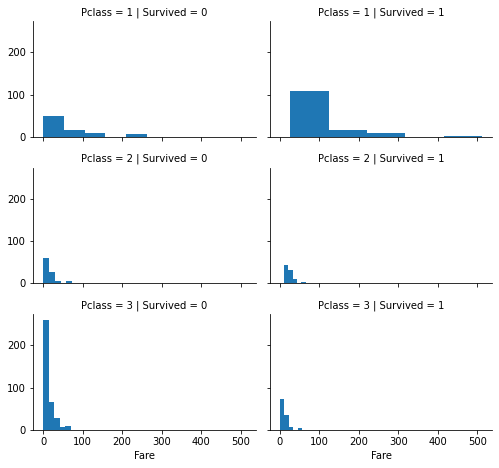

In [64]:
grid = sns.FacetGrid(train_df, col='Survived', row='Pclass', size=2.2, aspect=1.6)
grid.map(plt.hist, 'Fare', bins=5)

/opt/conda/lib/python3.7/site-packages/seaborn/axisgrid.py:316: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
/opt/conda/lib/python3.7/site-packages/seaborn/axisgrid.py:643: UserWarning: Using the pointplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)
/opt/conda/lib/python3.7/site-packages/seaborn/axisgrid.py:648: UserWarning: Using the pointplot function without specifying `hue_order` is likely to produce an incorrect plot.
  warnings.warn(warning)


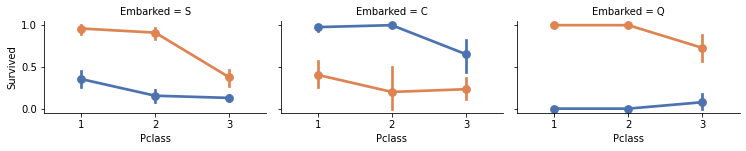

In [63]:
grid = sns.FacetGrid(train_df, col='Embarked', size=2.2, aspect=1.6)
grid.map(sns.pointplot, 'Pclass', 'Survived', 'Sex', palette='deep')

In [ ]:
train_df.head(5)

In [65]:
train_df = train_df.drop(['Ticket', 'Cabin'], axis=1)
test_df = test_df.drop(['Ticket', 'Cabin'], axis=1)
combine = [train_df, test_df]

In [66]:
for dataset in combine:
    dataset['Title'] = dataset.Name.str.extract(' ([A-Za-z]+)\.', expand=False)

pd.crosstab(train_df['Title'], train_df['Survived'])

Survived,0,1
Title,,
Capt,1,0
Col,1,1
Countess,0,1
Don,1,0
Dr,4,3
Jonkheer,1,0
Lady,0,1
Major,1,1
Master,17,23


In [67]:
for dataset in combine:
    dataset['Title'] = dataset['Title'].replace(['Lady', 'Countess','Capt', 'Col','Don', 'Dr', 'Major', 'Rev', 'Sir', 'Jonkheer', 'Dona'], 'Rare')

    dataset['Title'] = dataset['Title'].replace('Mlle', 'Miss')
    dataset['Title'] = dataset['Title'].replace('Ms', 'Miss')
    dataset['Title'] = dataset['Title'].replace('Mme', 'Mrs')
    
train_df[['Title', 'Survived']].groupby(['Title'], as_index=False).mean()

,Title,Survived
0,Master,0.575000
1,Miss,0.702703
2,Mr,0.156673
3,Mrs,0.793651
4,Rare,0.347826


In [68]:
title_mapping = {"Mr": 1, "Miss": 2, "Mrs": 3, "Master": 4, "Rare": 5}
for dataset in combine:
    dataset['Title'] = dataset['Title'].map(title_mapping)
    dataset['Title'] = dataset['Title'].fillna(0)
for dataset in combine:
    dataset['Sex'] = dataset['Sex'].map( {'female': 1, 'male': 0} ).astype(int)

In [ ]:
type(combine[0]['Age'][0])

In [ ]:
type(dataset['Age'])

In [69]:
for dataset in combine:  
    dataset['Age'] = dataset['Age'].astype(int)
    dataset.loc[ (dataset['Age']) <= 15, 'Age'] = 0
    dataset.loc[(dataset['Age'] > 15) & (dataset['Age'] <= 35), 'Age'] = 1
    dataset.loc[(dataset['Age'] > 35) & (dataset['Age'] <= 55), 'Age'] = 2
    dataset.loc[(dataset['Age'] > 55),'Age'] = 3

In [ ]:
dataset['Embarked'].head()

In [70]:
for dataset in combine:
    dataset['Embarked'] = dataset['Embarked'].map( {'S': 0, 'C': 1, 'Q': 2} ).astype(int)

In [71]:
for dataset in combine:
    dataset.loc[ dataset['Fare'] <= 10, 'Fare'] = 0
    dataset.loc[(dataset['Fare'] > 10) & (dataset['Fare'] <= 30), 'Fare'] = 1
    dataset.loc[(dataset['Fare'] > 30) & (dataset['Fare'] <= 80), 'Fare']   = 2
    dataset.loc[(dataset['Fare'] > 80), 'Fare']   = 3

In [72]:
train_df = train_df.drop(['Name','SibSp','Parch'], axis=1)
test_df = test_df.drop(['Name','SibSp','Parch'], axis=1)

In [ ]:
test_df.head(5)

Now we can test with different models

In [ ]:
X_train.head(5)

In [73]:
X_train = train_df.drop(['Survived'],axis=1)
Y_train = train_df['Survived']
X_test = test_df
print(X_train.shape, test_df.shape, Y_train.shape)

(891, 8) (418, 8) (891,)


In [74]:
X_train = X_train.drop(['PassengerId'],axis=1)
X_test = X_test.drop(['PassengerId'],axis=1)

In [75]:
X_train = X_train.drop(['Title'],axis=1)
X_test = X_test.drop(['Title'],axis=1)

In [76]:
median = test_df['Fare'].median()
test_df['Fare'] = test_df['Fare'].fillna(median)

In [ ]:
#LOGISTIC REGRESSION
from sklearn.linear_model import LogisticRegression
logrec = LogisticRegression(solver='lbfgs',max_iter=10000)
logrec.fit(X_train, Y_train)
predictions = logrec.predict(X_test)

logreg_data = pd.read_csv('/kaggle/input/titanic/test.csv')
logreg_data.insert((logreg_data.shape[1]),'Survived',predictions)
logreg_data.to_csv('LogisticRegression.csv')

In [ ]:
#SVC
from sklearn.svm import SVC, LinearSVC
svc = SVC()
svc.fit(X_train, Y_train)
predictions = svc.predict(X_test)
svc_data = pd.read_csv('/kaggle/input/titanic/test.csv')
svc_data = svc_data[['PassengerId']]
svc_data.insert((svc_data.shape[1]),'Survived',predictions)
svc_data.to_csv('SVC.csv')

# from sklearn.neighbors import KNeighborsClassifier
# from sklearn.naive_bayes import GaussianNB
# from sklearn.linear_model import Perceptron
# from sklearn.linear_model import SGDClassifier
# from sklearn.tree import DecisionTreeClassifier

In [ ]:
#RANDOMFOREST
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators=100)
rf.fit(X_train, Y_train)
predictions = rf.predict(X_test)
rf_data = pd.read_csv('/kaggle/input/titanic/test.csv')
rf_data = rf_data[['PassengerId']]
rf_data.insert((rf_data.shape[1]),'Survived',predictions)
rf_data.to_csv('rf.csv')


In [ ]:
#XGBOOST
import xgboost as xgb
gbm = xgb.XGBClassifier(
 n_estimators= 2000,
 max_depth= 8,
 min_child_weight= 2,
 gamma=0.5,                        
 subsample=0.9,
 colsample_bytree=0.9,
 objective= 'binary:logistic',
 nthread= -1,
 scale_pos_weight=1).fit(X_train, Y_train)
predictions = gbm.predict(X_test)
acc_gbm = round(gbm.score(X_train, Y_train) * 100, 2)
print(acc_gbm)
gbm_data = pd.read_csv('/kaggle/input/titanic/test.csv')
gbm_data = gbm_data[['PassengerId']]
gbm_data.insert((gbm_data.shape[1]),'Survived',predictions)
gbm_data.to_csv('gbm.csv')

In [ ]:
# Initialising the NN
import keras 
from keras.models import Sequential 
from keras.layers import Dense

model = Sequential()

# layers
model.add(Dense(32, kernel_initializer = 'uniform', activation = 'relu', input_dim = 6))
model.add(Dense(16, kernel_initializer = 'uniform', activation = 'relu'))
model.add(Dense(1, kernel_initializer = 'uniform', activation = 'sigmoid'))

# summary
model.summary()


# Compiling the NN
model.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

# Train the NN
model.fit(X_train_scaled, Y_train, batch_size = 32, epochs = 200)

In [ ]:
y_pred = model.predict(X_test)
y_final = (y_pred > 0.5).astype(int).reshape(X_test.shape[0])

In [ ]:
nn_data = pd.read_csv('/kaggle/input/titanic/test.csv')
nn_data = nn_data[['PassengerId']]
nn_data.insert((nn_data.shape[1]),'Survived',y_final)
nn_data.to_csv('nn6.csv')

In [ ]:
from sklearn.preprocessing import  StandardScaler
scaler = StandardScaler().fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [ ]:
from sklearn.model_selection import  GridSearchCV
from sklearn.ensemble import GradientBoostingClassifier
param_grid = {'max_depth': range(0,5), 
              'n_estimators': range(0,10), 
              'max_features': ['sqrt', 'auto'], 
              'warm_start': [True]}

grid = GridSearchCV(GradientBoostingClassifier(), param_grid=param_grid, n_jobs=-1, verbose=1).fit(X_train_scaled, Y_train)

In [ ]:
predictions = grid.predict(X_test)
acc_gbm = round(grid.score(X_train, Y_train) * 100, 2)
print(acc_gbm)
gbm_data = pd.read_csv('/kaggle/input/titanic/test.csv')
gbm_data = gbm_data[['PassengerId']]
gbm_data.insert((gbm_data.shape[1]),'Survived',predictions)
gbm_data.to_csv('grid.csv')
